In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

raw_names = np.arange(1,55)
names = [ 'c=20, l = 1.0', 'c=20, l = 0.3','c=15, l = 1.0','c=15, l = 0.3','c=10, l = 1.0','c=10, l = 0.3' ]

n_tab = [5000,2000,1000,500,200,100,50,20,10]

names_df_5000 = np.arange(1,7)
names_df_2000 = np.arange(7,13)
names_df_1000 = np.arange(13,19)

names_df_500 = np.arange(19,25)
names_df_200 = np.arange(25,31)
names_df_100 = np.arange(31,37)

names_df_50 = np.arange(37,43)
names_df_20 = np.arange(43,49)
names_df_10 = np.arange(49,55)

In [2]:
class Point():
    def __init__(self, data, n_value, X_value, c_value, lambd_value): 
        
        self.data = data
        self.data.columns = names
        self.n = n_value
        self.c = c_value
        self.lambd = lambd_value
        self.X = X_value
        
        self.mean = self.data.mean()
        self.std = self.data.std()  ## DO SPRAWDZENIA !!!
               
    def __repr__(self):
        return repr((self.data))
    
    def info(self):
        print("\nInfo:\nn = {0:}\tX = {1:}\tc = {2:}\tlambda = {3:}".format(self.n, self.X, self.c, self.lambd) )
        print("Mean = {0:}\tstd = {1:}".format(self.mean, self.std)  )
        
    def get_data(self):
        return self.data
    
    def get_mean(self):
        return self.mean
    
    def get_std(self):
        return self.std
    
    def get_n(self):
        return self.n
    
    def get_X(self):
        return self.X
    
    def get_c(self):
        return self.c
    
    def get_lambd(self):
        return self.lambd



### Get points from raw Data Frame

In [3]:
def get_six_points(df, i, n, X):

    pp = []
    pp.append( Point( df[i*6 +1], n_value = n, X_value = X, c_value = 0.20, lambd_value = 1.0) )
    pp.append( Point( df[i*6 +2], n_value = n, X_value = X, c_value = 0.20, lambd_value = 0.3) )
    pp.append( Point( df[i*6 +3], n_value = n, X_value = X, c_value = 0.15, lambd_value = 1.0) )
    pp.append( Point( df[i*6 +4], n_value = n, X_value = X, c_value = 0.15, lambd_value = 0.3) )
    pp.append( Point( df[i*6 +5], n_value = n, X_value = X, c_value = 0.10, lambd_value = 1.0) )
    pp.append( Point( df[i*6 +6], n_value = n, X_value = X, c_value = 0.10, lambd_value = 0.3) )

    return pp

In [4]:
def get_points(df, X = 50):
    
    points_tab = []
    
    for i in range(9):
        tmp =  get_six_points(df, i = i, n = n_tab[i], X = X) 

        for p in tmp:
            points_tab.append(p)          
        
   
    return points_tab


### Get Data Frame from points

In [5]:
def get_df_from_points(points):
    n = []
    max_range = []
    delta_max_range = []

    for p in points:
        n.append( p.get_n()) 
        max_range.append( p.get_mean()) 
        delta_max_range.append( p.get_std()) 
        
    return pd.DataFrame( np.array([n,max_range, delta_max_range]).transpose(), columns = ['n', 'max_range', 'delta_m']  )

## START

In [6]:
df50 = pd.read_csv('maxima_X50.csv', skiprows = 2,  names = raw_names)
df100 = pd.read_csv('maxima_X100.csv', skiprows = 2,  names = raw_names)

df50 =  df50.apply(np.sqrt, axis = 1)
df100 =  df100.apply(np.sqrt, axis = 1)
df100.head()

,1,2,3,4,5,6,7,8,9,10,...,45,46,47,48,49,50,51,52,53,54
0,68.622154,38.209946,70.710678,33.526109,70.007142,68.622154,68.622154,23.537205,70.710678,41.146081,...,23.000000,11.045361,22.360680,13.892444,14.866069,10.000000,15.297059,16.031220,15.000000,11.180340
1,67.896981,17.262677,70.007142,38.639358,70.710678,69.296465,49.648766,13.152946,70.710678,70.007142,...,19.235384,12.041595,24.083189,12.369317,13.038405,10.198039,16.124515,13.038405,15.000000,13.453624
2,70.007142,28.000000,70.007142,39.812058,70.710678,70.710678,67.882251,26.419690,69.296465,63.411355,...,21.095023,12.041595,24.020824,17.720045,13.038405,11.180340,15.132746,10.295630,17.029386,10.440307
3,55.461698,13.928388,70.007142,66.603303,70.710678,70.710678,53.712196,17.492856,70.710678,52.924474,...,22.561028,12.649111,22.090722,13.038405,15.132746,11.704700,15.132746,10.198039,15.132746,12.206556
4,43.011626,21.023796,70.710678,59.908263,70.710678,70.710678,63.890531,14.317821,70.710678,62.241465,...,22.022716,13.152946,23.194827,15.297059,15.524175,13.038405,13.928388,12.000000,15.297059,10.295630


In [12]:
def get_plot(df, X, filename):
    
    points_tab = get_points(df = df, X = X)

    points_c20_l1 = []
    points_c20_l03 = []
    points_c15_l1 = []
    points_c15_l03 = []
    points_c10_l1 = []
    points_c10_l03 = []

    for p in points_tab:
        if p.get_c() == 0.2:
            if p.get_lambd() == 1.0:
                points_c20_l1.append(p)

            elif p.get_lambd() == 0.3:
                points_c20_l03.append(p)

        elif p.get_c() == 0.15:
            if p.get_lambd() == 1.0:
                points_c15_l1.append(p)
            elif p.get_lambd() == 0.3:
                points_c15_l03.append(p)

        elif p.get_c() == 0.1:
            if p.get_lambd() == 1.0:
                points_c10_l1.append(p)
            elif p.get_lambd() == 0.3:
                points_c10_l03.append(p)
###########################################################################################################                
    df_c20_l1 = get_df_from_points(points_c20_l1)
    df_c20_l03 = get_df_from_points(points_c20_l03)
    df_c15_l1 = get_df_from_points(points_c15_l1)
    df_c15_l03 = get_df_from_points(points_c15_l03)
    df_c10_l1 = get_df_from_points(points_c10_l1)
    df_c10_l03 = get_df_from_points(points_c10_l03)
###########################################################################################################
    fig, axs = plt.subplots(nrows = 1, ncols = 3, sharex = False, figsize = (16,5))

    for ax in axs:
        ax.yaxis.label.set_size(16)
        ax.xaxis.label.set_size(16)

        ax.set_ylabel('max range')
        ax.set_xlabel('time')

        ax.tick_params(grid_color='gray', grid_alpha=0.5, labelcolor = "black", labelsize = 15)      
        ax.grid(True)

        ax.set_xlim([0,5200])
        ax.set_ylim([0,75])    

    axs[0].errorbar(df_c10_l1['n'],df_c10_l1['max_range'], yerr = df_c10_l1['delta_m'], 
                    color = "purple", label= u'\u03BB = 1.0' , fmt='-o')
    axs[0].errorbar(df_c10_l03['n'],df_c10_l03['max_range'],yerr = df_c10_l03['delta_m'], 
                    color = "red", label= u'\u03BB = 0.3' , fmt='-o')
    axs[0].set_title('c = 0.1', fontsize = 20)


    axs[1].errorbar(df_c15_l1['n'], df_c15_l1['max_range'], yerr = df_c15_l1['delta_m'],
                    color = "purple", label= u'\u03BB = 1.0' , fmt='-o')
    axs[1].errorbar(df_c15_l03['n'], df_c15_l03['max_range'], yerr = df_c15_l03['delta_m'], 
                    color = "red", label= u'\u03BB = 0.3' , fmt='-o')
    axs[1].set_title('c = 0.15', fontsize = 20)


    axs[2].errorbar(df_c20_l1['n'], df_c20_l1['max_range'], yerr = df_c20_l1['delta_m'],
                    color = "purple", label=u'\u03BB = 1.0', fmt='-o')
    axs[2].errorbar(df_c20_l03['n'], df_c20_l03['max_range'], yerr = df_c20_l03['delta_m'],
                    color = "red", label= u'\u03BB = 0.3' , fmt='-o')
    axs[2].set_title('c = 0.2', fontsize = 20)
    axs[0].legend(loc='lower right',fontsize = 15)

    fig.tight_layout()
    fig.savefig(filename)

            

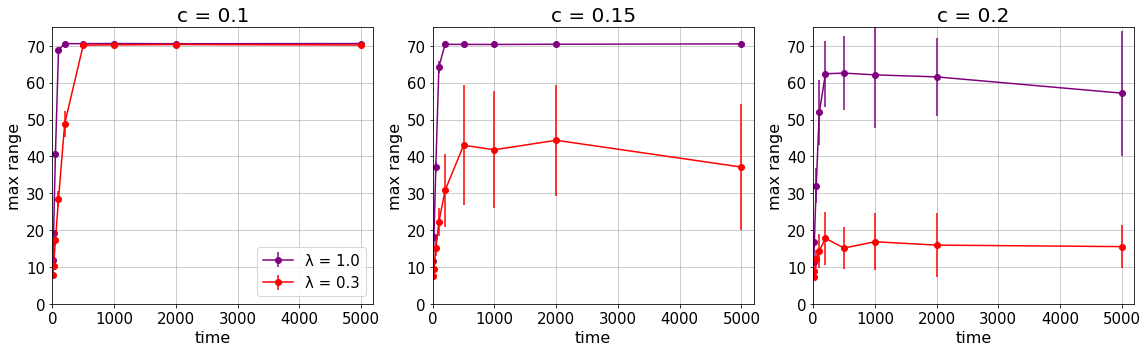

In [13]:
get_plot(df50, X = 50, filename = 'X50.png')

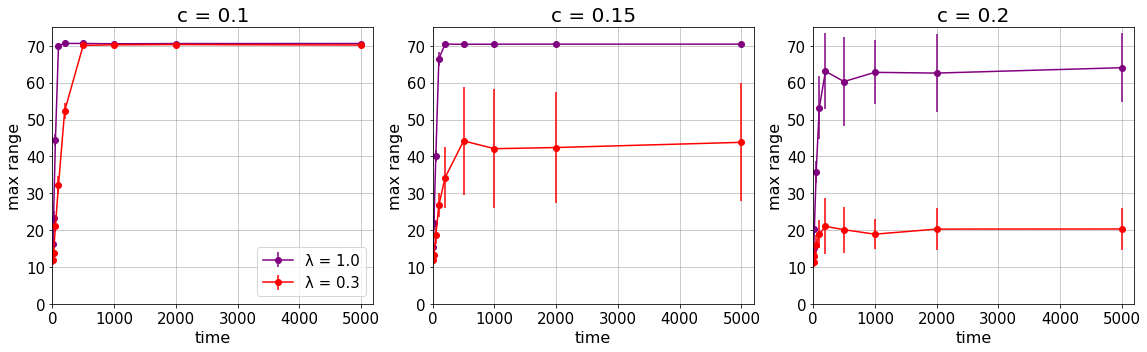

In [14]:
get_plot(df100, X = 100, filename = 'X100.png')